
# Analyse de données sur le tabagisme chez les femmes dans l'intervalle de 20 ans

### Les données restreint de travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977) et la suite de cette étude a été menée vingt ans plus tard. Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude.  La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage. 



Importations des bibliothéques

In [13]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import csv

importataion des données du site de inria.

In [14]:
data=pd.read_csv('https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv?inline=false')#, skiprows=1)

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant skiprows=1.

Affichage des données

In [117]:
data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
...     ...    ...   ...
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

***Le tableau ci-haut est l'ensemble de données d'étude. Il est composé de 1314 lignes et de 3 colonnes***

In [51]:
data.columns

Index(['Smoker', 'Status', 'Age'], dtype='object')

 '''Voici l'explication des colonnes données

| Nom de colonne | Libéllé du colonne | 
| :--------------- |:---------------:| 
| Age  | Age du sujet| 
| Smoker | Le tabagisme ou non deu sujet            |   
| statuts | son statuts de vie après le 20 ans         |   

### Représentation dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. 

### Nombre totale de femme vivante en focntion de leur tabagisme 

In [59]:
femme_vivante_filtrage=((data['Status']=='Alive'))
data.loc[femme_vivante_filtrage,[ 'Status', 'Smoker']]


Status Smoker
0     Alive    Yes
1     Alive    Yes
3     Alive     No
4     Alive    Yes
5     Alive     No
...     ...    ...
1307  Alive    Yes
1308  Alive     No
1309  Alive    Yes
1310  Alive     No
1313  Alive     No

[945 rows x 2 columns]

Le tableau ci-haut regroupe le nombre total de femmes vivantes en fonction de leur tabagisme. 
***On remarque qu'on à 945 femmes vivantes.***


### Nombre totale de femme décedé en fonction de leur tabagisme 

In [128]:
femme_morte_filtrage=((data['Status']=='Dead'))
data.loc[femme_morte_filtrage,[ 'Status', 'Smoker']]

Status Smoker
2      Dead     No
7      Dead    Yes
11     Dead     No
14     Dead     No
20     Dead     No
...     ...    ...
1299   Dead    Yes
1300   Dead     No
1306   Dead     No
1311   Dead    Yes
1312   Dead     No

[369 rows x 2 columns]

Le tableau ci-haut regroupe le nombre total de femmes décédés en fonction de leur tabagisme. 
 ***On remarque qu'on à 369 femmes décédés***

In [350]:
femme_decede_filtrage=((data['Status']=='Dead'))
femme_fumeuse_filtrage=((data['Smoker']=='Yes'))
femme_non_fumeuse_filtrage=((data['Smoker']=='No'))
fumeuse_decede=((data['Smoker']=='Yes') & (data['Status']=='Dead'))
fumeuse_vivante=((data['Smoker']=='Yes') & (data['Status']=='Alive'))
non_fumeuse_decede=((data['Smoker']=='No') & (data['Status']=='Dead'))
non_fumeuse_vivante=((data['Smoker']=='Yes') & (data['Status']=='Alive'))

### Nombre totale de femme fumeuses

In [351]:
print (" Le nombre de femme fumeuse est de ", len (data.loc[femme_fumeuse_filtrage,['Smoker']]), 'femmes')

 Le nombre de femme fumeuse est de  582 femmes


***Le nombre de décès parmis les fumeuses***

In [352]:
print ("Le nombre de décès parmis les fumeuses est de ",len(data.loc[fumeuse_decede,['Smoker','Status']]), "femmes")


Le nombre de décès parmis les fumeuses est de  139 femmes


### Nombre total de femme non fumeuses

In [353]:
print (" Le nombre total de femme non fumeuses est de ",len(data.loc[femme_non_fumeuse_filtrage,['Smoker']]), "femmes")



 Le nombre total de femme non fumeuses est de  732 femmes


***Le nombre de décès parmis les non fumeuses***

In [354]:
print (" Le nombre de décès parmis les non fumeuses est de",len(data.loc[non_fumeuse_decede,['Smoker','Status']]), " femmes")

 Le nombre de décès parmis les non fumeuses est de 230  femmes


## Calcul de taux de mortalité dans les groupes

### Cas femme fumeuse

Le taux étant le rapport entre le nombre de femmes du groupe  décédée et l'ensemble du groupe.


In [125]:
taux_fumeuse=len (data.loc[fumeuse_decede, [ 'Status', 'Smoker']])/len ( data.loc[femme_fumeuse_filtrage,['Smoker']])
print (" Le taux de mortalité chez les femmmes  fumeuses est de ", taux_fumeuse*100, "%")

 Le taux de mortalité chez les femmmes  fumeuses est de  23.883161512027492 %


### Cas de femme non fumeuse

In [355]:
taux_non_fumeuse=len (data.loc[non_fumeuse_decede, [ 'Status', 'Smoker']])/len ( data.loc[femme_non_fumeuse_filtrage,['Smoker']])
print (" Le taux de mortalité chez les femmmes non fumeuses est de ", taux_non_fumeuse*100, "%")
                                                                    

 Le taux de mortalité chez les femmmes non fumeuses est de  31.420765027322407 %


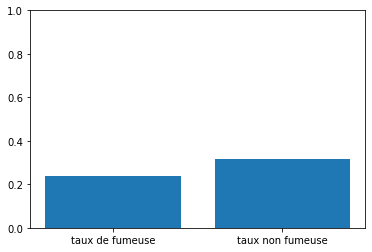

In [165]:

names = ['taux de fumeuse', 'taux non fumeuse'] # nom des barres
values = [taux_fumeuse, taux_non_fumeuse]
pl.bar(names, values) 
pl.ylim(0,1)
pl.show() 

***Ce résultat est surprenant dans la mesure où le taux de mortalité de femmes fumeuses est plus faible que celle de non fumeuses.***

### Nous Reprenons la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.


## 18-34 ans


In [356]:
femme_fumeuse_filtrage_18_34=((data['Smoker']=='Yes') & (data['Age']<=34)&  (data['Age']>=18) )
femme_non_fumeuse_filtrage_18_34=((data['Smoker']=='No') & ( (data['Age']<=34)&  (data['Age']>=18)))
fumeuse_decede_18_34=((data['Smoker']=='Yes') & (data['Status']=='Dead')& (data['Age']<=34)&  (data['Age']>=18))
fumeuse_vivante_18_34=((data['Smoker']=='Yes') & (data['Status']=='Alive')& (data['Age']<=34)&  (data['Age']>=18))
non_fumeuse_decede_18_34=((data['Smoker']=='No') & (data['Status']=='Dead')& (data['Age']<=34)&  (data['Age']>=18))
non_fumeuse_vivante_18_34=((data['Smoker']=='Yes') & (data['Status']=='Alive')& (data['Age']<=34)&  (data['Age']>=18))


### Nombre totale de femme fumeuses

In [357]:
print (" Le nombre de femme fumeuse est de ", len (data.loc[femme_fumeuse_filtrage_18_34,['Smoker']]), 'femmes')

 Le nombre de femme fumeuse est de  181 femmes


***Le nombre de décès parmis les fumeuses***

In [358]:
print (" Le nombre de décès parmis les fumeuses est de",len(data.loc[fumeuse_decede_18_34,['Smoker','Status']]), " femmes")

 Le nombre de décès parmis les fumeuses est de 5  femmes


### Nombre total de femme non fumeuses

In [359]:
print (" Le nombre total de femme non fumeuses est de ",len(data.loc[femme_non_fumeuse_filtrage_18_34,['Smoker']]), "femmes")


 Le nombre total de femme non fumeuses est de  219 femmes


***Le nombre de décès parmis les non fumeuses***

In [363]:
print (" Le nombre de décès parmis les non fumeuses est de",len(data.loc[non_fumeuse_decede_18_34,['Smoker','Status']]), " femmes")


 Le nombre de décès parmis les non fumeuses est de 6  femmes


## Calcul de taux de mortalité 18-34 ans 

### Cas fumeuses

In [364]:
taux_fumeuse_18_34=len (data.loc[fumeuse_decede_18_34, [ 'Status', 'Smoker']])/len ( data.loc[femme_fumeuse_filtrage_18_34,['Smoker']])
print (" Le taux de mortalité chez les femmmes  fumeuses agées de 18-34 ans  est de ", taux_fumeuse_18_34*100, "%")

 Le taux de mortalité chez les femmmes  fumeuses agées de 18-34 ans  est de  2.7624309392265194 %


### Cas non fumeuses

In [365]:
taux_non_fumeuse_18_34=len (data.loc[non_fumeuse_decede_18_34, [ 'Status', 'Smoker']])/len ( data.loc[femme_non_fumeuse_filtrage_18_34,['Smoker']])
print (" Le taux de mortalité chez les femmmes non fumeuses agées de 18-34 ans  est de ", taux_non_fumeuse_18_34*100, "%")
                                                                    

 Le taux de mortalité chez les femmmes non fumeuses agées de 18-34 ans  est de  2.73972602739726 %


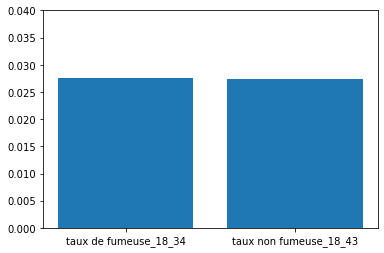

In [277]:
names = ['taux de fumeuse_18_34', 'taux non fumeuse_18_34'] # nom des barres
values = [taux_fumeuse_18_34, taux_non_fumeuse_18_34]
pl.bar(names, values) 
pl.ylim(0,0.04)
pl.show() 

***Dans ce cas on remarque un leger différence , le taux de mortalité de femmess fumeuses est relativement plus grand.***

# CAS 34-54 ans

In [366]:
femme_fumeuse_filtrage_34_54=((data['Smoker']=='Yes') & (data['Age']<=54)&  (data['Age']>=34) )
femme_non_fumeuse_filtrage_34_54=((data['Smoker']=='No') & ( (data['Age']<=54)&  (data['Age']>=34)))
fumeuse_decede_34_54=((data['Smoker']=='Yes') & (data['Status']=='Dead')& (data['Age']<=54)&  (data['Age']>=34))
fumeuse_vivante_34_54=((data['Smoker']=='Yes') & (data['Status']=='Alive')& (data['Age']<=54)&  (data['Age']>=34))
non_fumeuse_decede_34_54=((data['Smoker']=='No') & (data['Status']=='Dead')& (data['Age']<=54)&  (data['Age']>=34))
non_fumeuse_vivante_34_54=((data['Smoker']=='Yes') & (data['Status']=='Alive')& (data['Age']<=54)&  (data['Age']>=34))



### Nombre totale de femme fumeuses

In [368]:
print (" Le nombre de femme fumeuse est de ", len (data.loc[femme_fumeuse_filtrage_34_54,['Smoker']]), 'femmes')

 Le nombre de femme fumeuse est de  239 femmes


***Le nombre de décès parmis les fumeuses***

In [367]:
print (" Le nombre de décès parmis les fumeuses est de",len(data.loc[fumeuse_decede_34_54,['Smoker','Status']]), " femmes")

 Le nombre de décès parmis les fumeuses est de 41  femmes


### Nombre total de femme non fumeuses

In [293]:
print (" Le nombre total de femme non fumeuses est de ",len(data.loc[femme_non_fumeuse_filtrage_34_54,['Smoker']]), "femmes")

 Le nombre total de femme non fumeuses est de  199 femmes


***Le nombre de décès parmis les non fumeuses***

In [369]:
print (" Le nombre de décès parmis les non fumeuses est de",len(data.loc[non_fumeuse_decede_34_54,['Smoker','Status']]), " femmes")

 Le nombre de décès parmis les non fumeuses est de 19  femmes


## Calcul de taux de mortalité 34-54 ans 

In [370]:
taux_fumeuse_34_54=len (data.loc[fumeuse_decede_34_54, [ 'Status', 'Smoker']])/len ( data.loc[femme_fumeuse_filtrage_34_54,['Smoker']])
print (" Le taux de mortalité chez les femmmes  fumeuses agées de 34-54 ans  est de ", taux_fumeuse_34_54*100, "%")

 Le taux de mortalité chez les femmmes  fumeuses agées de 34-54 ans  est de  17.154811715481173 %


In [371]:
taux_non_fumeuse_34_54=len (data.loc[non_fumeuse_decede_34_54, [ 'Status', 'Smoker']])/len ( data.loc[femme_non_fumeuse_filtrage_34_54,['Smoker']])
print (" Le taux de mortalité chez les femmmes non fumeuses agées de 34-54 ans  est de ", taux_non_fumeuse_34_54*100, "%")                                                          

 Le taux de mortalité chez les femmmes non fumeuses agées de 34-54 ans  est de  9.547738693467336 %


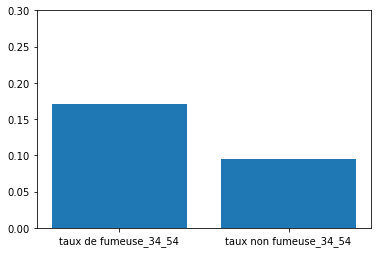

In [313]:
names = ['taux de fumeuse_34_54', 'taux non fumeuse_34_54'] # nom des barres
values = [taux_fumeuse_34_54, taux_non_fumeuse_34_54]
pl.bar(names, values) 
pl.ylim(0,0.3)
pl.show() 

***Cette fois-ci on constate que le taux de mortalité est assez important chez les femmes fumeuses que les non fumeuses***


# Cas 55-64 ans

In [372]:
femme_fumeuse_filtrage_55_64=((data['Smoker']=='Yes') & (data['Age']<=64)&  (data['Age']>=55) )
femme_non_fumeuse_filtrage_55_64=((data['Smoker']=='No') & ( (data['Age']<=64)&  (data['Age']>=55)))
fumeuse_decede_55_64=((data['Smoker']=='Yes') & (data['Status']=='Dead')& (data['Age']<=64)&  (data['Age']>=55))
fumeuse_vivante_55_64=((data['Smoker']=='Yes') & (data['Status']=='Alive')& (data['Age']<=64)&  (data['Age']>=55))
non_fumeuse_decede_55_64=((data['Smoker']=='No') & (data['Status']=='Dead')& (data['Age']<=64)&  (data['Age']>=55))
non_fumeuse_vivante_55_64=((data['Smoker']=='Yes') & (data['Status']=='Alive')& (data['Age']<=64)&  (data['Age']>=55))



### Nombre totale de femmes fumeuses

In [322]:
print (" Le nombre de femme fumeuse agées de 55-64 ans est de ", len (data.loc[femme_fumeuse_filtrage_55_64,['Smoker']]), 'femmes')

 Le nombre de femme fumeuse agées de 55-64 ans est de  115 femmes


***Le nombre de décès parmis les fumeuses***

In [373]:
print (" Le nombre de décès parmis les fumeuses agées de 55-64 ans est de",len(data.loc[fumeuse_decede_55_64,['Smoker','Status']]), " femmes")

 Le nombre de décès parmis les fumeuses agées de 55-64 ans est de 51  femmes


### Nombre total de femme non fumeuses

In [330]:
print (" Le nombre total de femme non fumeuses agées de 55-64 ans est de ",len(data.loc[femme_non_fumeuse_filtrage_55_64,['Smoker']]), "femmes")

 Le nombre total de femme non fumeuses agées de 55-64 ans est de  121 femmes


***Le nombre de décès parmis les non fumeuses***

In [375]:
print (" Le nombre de décès parmis les non fumeuses agées de 55-64 ans est de",len(data.loc[non_fumeuse_decede_55_64,['Smoker','Status']]), " femmes")

 Le nombre de décès parmis les non fumeuses agées de 55-64 ans est de 40  femmes


## Calcul de taux de mortalité 55-64 ans 

In [376]:
taux_fumeuse_55_64=len (data.loc[fumeuse_decede_55_64, [ 'Status', 'Smoker']])/len ( data.loc[femme_fumeuse_filtrage_55_64,['Smoker']])
print (" Le taux de mortalité chez les femmmes fumeuses agées de 55-64 ans  est de ", taux_fumeuse_55_64*100, "%")

 Le taux de mortalité chez les femmmes fumeuses agées de 55-64 ans  est de  44.34782608695652 %


In [377]:
taux_non_fumeuse_55_64=len (data.loc[non_fumeuse_decede_55_64, [ 'Status', 'Smoker']])/len ( data.loc[femme_non_fumeuse_filtrage_55_64,['Smoker']])
print (" Le taux de mortalité chez les femmmes non fumeuses agées de 34-54 ans  est de ", taux_non_fumeuse_55_64*100, "%")                                                        

 Le taux de mortalité chez les femmmes non fumeuses agées de 34-54 ans  est de  33.057851239669425 %


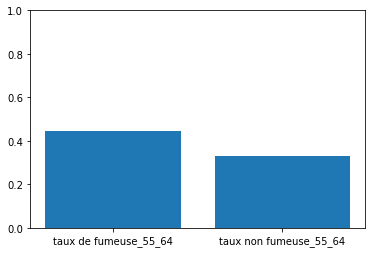

In [316]:
names = ['taux de fumeuse_55_64', 'taux non fumeuse_55_64'] # nom des barres
values = [taux_fumeuse_55_64, taux_non_fumeuse_55_64]
pl.bar(names, values) 
pl.ylim(0,1)
pl.show() 

***Cette fois-ci on constate que le taux de mortalité est aussi assez important chez les femmes fumeuses que les non fumeuses***

# Cas 64 et plus

In [378]:
femme_fumeuse_filtrage_64=((data['Smoker']=='Yes') &   (data['Age']>=64) )
femme_non_fumeuse_filtrage_64=((data['Smoker']=='No') &  (data['Age']>=64))
fumeuse_decede_64=((data['Smoker']=='Yes') & (data['Status']=='Dead')&  (data['Age']>=64))
fumeuse_vivante_64=((data['Smoker']=='Yes') & (data['Status']=='Alive')&  (data['Age']>=64))
non_fumeuse_decede_64=((data['Smoker']=='No') & (data['Status']=='Dead')&  (data['Age']>=64))
non_fumeuse_vivante_64=((data['Smoker']=='Yes') & (data['Status']=='Alive')&  (data['Age']>=64))



### Nombre totale de femmes fumeuses

In [323]:
print (" Le nombre de femme fumeuse agées de 64 ans et plus est de ", len (data.loc[femme_fumeuse_filtrage_64,['Smoker']]), 'femmes')

 Le nombre de femme fumeuse agées de 64 ans et plus est de  49 femmes


***Le nombre de décès parmis les fumeuses de 64 ans et plus***

In [379]:
print (" Le nombre de décès parmis les fumeuses agées de 64 ans et plus est de",len(data.loc[fumeuse_decede_64,['Smoker','Status']]), " femmes")

 Le nombre de décès parmis les fumeuses agées de 64 ans et plus est de 42  femmes


### Nombre total de femme non fumeuses

In [331]:
print (" Le nombre total de femme non fumeuses agées de 64 ans et plus est de ",len(data.loc[femme_non_fumeuse_filtrage_64,['Smoker']]), "femmes")

 Le nombre total de femme non fumeuses agées de 64 ans et plus est de  195 femmes


***Nombre de décès de non fumeuse de 64 ans et plus***

In [380]:
print (" Le nombre de décès parmis les non fumeuses agées de 64 ans et plus est de",len(data.loc[non_fumeuse_decede_64,['Smoker','Status']]), " femmes")

 Le nombre de décès parmis les non fumeuses agées de 64 ans et plus est de 166  femmes


### Calcul de taux de mortalité de fumeuses agées de 64 ans et plus

In [381]:
taux_fumeuse_64=len (data.loc[fumeuse_decede_64, [ 'Status', 'Smoker']])/len ( data.loc[femme_fumeuse_filtrage_64,['Smoker']])
print (" Le taux de mortalité chez les femmmes fumeuses agées de 64 ans et plus est de ", taux_fumeuse_64*100, "%")

 Le taux de mortalité chez les femmmes fumeuses agées de 64 ans et plus est de  85.71428571428571 %


In [382]:
taux_non_fumeuse_64=len (data.loc[non_fumeuse_decede_64, [ 'Status', 'Smoker']])/len ( data.loc[femme_non_fumeuse_filtrage_64,['Smoker']])
print (" Le taux de mortalité chez les femmmes non fumeuses agées de 34-54 ans  est de ", taux_non_fumeuse_64*100, "%")
                                                                

 Le taux de mortalité chez les femmmes non fumeuses agées de 34-54 ans  est de  85.12820512820512 %


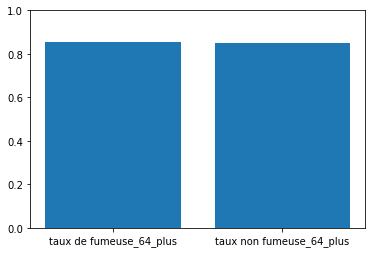

In [383]:
names = ['taux de fumeuse_64_plus', 'taux non fumeuse_64_plus'] # nom des barres
values = [taux_fumeuse_64, taux_non_fumeuse_64]
pl.bar(names, values) 
pl.ylim(0,1)
pl.show() 


***On remarque le taux sont assez proches au délà de 64 ans***

# Conclusion

De ce paraxode, on comprend que le taux de mortalité est assez complexe pour une étude sur des tranges d'âges différents.
Mais globalement le taux est plus important pour les femmes fumeuses mais étrangement il est faible pour certaines tranges d'âges. Cela s'explique par un nombre cause, telle la durée de l'éffect du tabac sur l'organisme, morbidité des personnes âgées...
L'analyse de données doit tenir compte préablement du facteur de confusion.